In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
!pip install --upgrade --force-reinstall numpy scipy pandas matplotlib scikit-learn gensim konlpy

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached matplotlib-3.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached konlpy-0.6.0-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_

In [3]:
!pip uninstall -y numpy scipy pandas matplotlib scikit-learn gensim konlpy
!pip install numpy scipy pandas matplotlib scikit-learn gensim konlpy

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
Found existing installation: matplotlib 3.10.3
Uninstalling matplotlib-3.10.3:
  Successfully uninstalled matplotlib-3.10.3
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: konlpy 0.6.0
Uninstalling konlpy-0.6.0:
  Successfully uninstalled konlpy-0.6.0
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 k

In [14]:
# 라이브러리 임포트
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
# 1. 데이터 준비와 전처리
# 동화 텍스트 생성 및 저장
fairy_tale_text = """
1. 오래된 성벽 너머로 붉은 노을이 드리워진 어느 밤, 숲속에 은은한 마법빛이 어른거리며 퍼지고 있었다.
2. 그 빛 속에서 나타난 이는 십 년 전 행방불명된 왕자였다.
3. 왕자는 어릴 적 공주와 함께 뛰놀던 성을 떠난 뒤, 마법의 비밀을 찾아 떠돌았다고 했다.
4. 마을 사람들은 그가 곧 돌아오리라 믿었으나, 소식은 묘연했다.
5. 그러던 중 사악한 마법사가 공주를 납치해 검은 탑에 가두었다는 소식이 들려왔다.
6. 탑 주변에는 강력한 보호 룬이 깔려 있어, 지상(地上)에서는 결코 문을 열 수 없었다.
7. 마법사는 공주의 용기를 꺾어 자신의 어둠의 제단에 바치려 했다.
8. 왕자는 칼 대신 오래된 주문서를 펼치고, **‘용의 영혼 결정’**을 소환하는 의식을 준비했다.
9. 이 의식은 용에게서 **심장의 일부**가 아니라, 용의 **영혼 일부**—즉 생명력을 나누어 받는 계약이다.
10. 계약이 성립되면 용은 전신을 잃지 않고, 대신 **영혼의 수정 조각**을 하나 내어준다.
11. 왕자는 그 수정 조각을 가슴에 품고 탑 앞으로 향했다.
12. 의식을 시작하자 땅이 떨리고, 숲속 깊은 동굴에서 거대한 용 한 마리가 모습을 드러냈다.
13. 용은 왕자의 결의와 용기를 시험하고자 깊은 눈빛으로 그를 내려다보았다.
14. 왕자가 조용히 말하였다.
> “나는 네 생명 일부를 가져가려는 게 아니다. 공주를 구할 힘을 빌릴 뿐이다.”
15. 용은 고개를 끄덕이며, 날개 아래에서 빛나는 **영혼의 결정**을 한 조각 흩뿌렸다.
16. 그 수정이 반짝이며 왕자에게 흡수되자, 그의 손끝에서 황금빛 마법 에너지가 맹렬히 타올랐다.
17. 왕자는 에너지를 집중해 탑을 감싸던 검은 룬을 하나씩 해체했다.
18. 마법진이 풀리자 탑 문이 삐걱이며 열렸다.
19. 공주는 무사히 모습을 드러내었고, 왕자의 눈빛을 보며 안도의 한숨을 내쉬었다.
20. 그러나 마법사는 마지막 남은 힘으로 탑을 무너뜨려 둘을 가두려 했다.
21. 그때 동굴 위 하늘에서 용이 내지른 **거대한 포효(Protego Roar)**가 울려 퍼져, 무너지는 탑의 잔해를 막아냈다.
22. 포효의 충격파가 마법사의 어둠의 마력을 사방으로 흩어뜨리자, 그는 힘을 잃고 땅에 쓰러졌다.
23. 왕자와 공주는 용의 거대한 날개 아래에서 안전히 벗어났다.
24. 마법사는 결국 동굴 아래 갇혀버렸고, 왕국에는 고요한 평화가 찾아왔다.
25. 왕자와 공주는 성으로 돌아와, **용의 영혼 결정**을 성 안 신성 보관소에 안치했다.
26. 이후 매년 마법 축제가 열려, 용과 맺은 약속을 기념하며 희망을 노래했다.
27. 공주는 새롭게 얻은 용기와 지혜로 백성을 이끌었고,
28. 왕국 사람들은 “진정한 힘은 희생이 아닌, 생명을 이어주는 계약에서 온다”는 교훈을 전해 들었다.
29. 그리하여 용의 영혼 결정은 단순한 마법물이 아니라,
30. **용기와 신뢰의 상징**으로 영원히 빛나게 되었다.
"""

with open('/content/fairy_tale.txt', 'w', encoding='utf-8') as f:
    f.write(fairy_tale_text)

def preprocess_text(text):
    # Okt 형태소 분석기 초기화
    okt = Okt()

    # 1. 특수문자와 숫자 제거 (정규표현식 사용)
    text = re.sub(r'[^가-힣\s]', '', text)

    # 2. 형태소 토큰화
    tokens = okt.morphs(text)

    # 3. 불용어 목록 (확장)
    stopwords = ['은', '는', '이', '가', '을', '를', '와', '과', '의',
                 '에', '로', '으로', '한', '된', '것', '들', '에서', '에는', '이며', '아래', '했다', '이다']

    # 4. 전처리:
    # - 길이 1 이하 토큰 제거 ('용', '성' 같은 중요 단어는 유지)
    # - 불용어 제거
    tokens = [token for token in tokens
              if (len(token) > 1 or token in ['용', '성', '탑', '검', '땅'])
              and token not in stopwords]

    return tokens

# 텍스트 파일 읽고 전처리
with open('/content/fairy_tale.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# 전체 텍스트 토큰화
processed_tokens = preprocess_text(text)
print("전처리된 토큰 수:", len(processed_tokens))
print("첫 20개 토큰:", processed_tokens[:20])

# 토큰 빈도 확인
from collections import Counter
token_counts = Counter(processed_tokens)
print("\n토큰 빈도:")
for token, count in token_counts.most_common(10):
    print(f"{token}: {count}회")

전처리된 토큰 수: 289
첫 20개 토큰: ['\n ', '오래된', '성벽', '너머', '붉은', '노을', '드리워진', '어느', '숲속', '은은한', '마법', '어른거리며', '퍼지고', '있었다', '나타난', '이는', '행방불명', '왕자', '였다', '왕자']

토큰 빈도:
왕자: 11회
공주: 8회
탑: 7회
영혼: 6회
마법: 5회
마법사: 5회
용의: 5회
용기: 4회
결정: 4회
성: 3회


In [15]:
# 2: Word2Vec 모델 학습
# CBOW 모델 학습
cbow_model = Word2Vec(
    [processed_tokens],
    vector_size=50,
    window=3,
    min_count=2,
    sg=0  # CBOW 모드
)

# Skip-gram 모델 학습
skipgram_model = Word2Vec(
    [processed_tokens],
    vector_size=50,
    window=3,
    min_count=2,
    sg=1  # Skip-gram 모드
)

# 학습 시간 측정
import time

def measure_training_time(model_type):
    start_time = time.time()
    if model_type == 'CBOW':
        Word2Vec([processed_tokens], vector_size=50, window=3, min_count=2, sg=0)
    else:
        Word2Vec([processed_tokens], vector_size=50, window=3, min_count=2, sg=1)
    end_time = time.time()
    return end_time - start_time

cbow_time = measure_training_time('CBOW')
skipgram_time = measure_training_time('Skip-gram')

print(f"CBOW 학습 시간: {cbow_time:.4f}초")
print(f"Skip-gram 학습 시간: {skipgram_time:.4f}초")

CBOW 학습 시간: 0.0049초
Skip-gram 학습 시간: 0.0051초


In [16]:
# 3: 유사도 분석
# 주요 키워드에 대한 유사 단어 찾기
keywords = ['왕자', '공주', '마법', '용', '성']

def find_similar_words(model, keywords):
    for keyword in keywords:
        try:
            similar_words = model.wv.most_similar(keyword, topn=5)
            print(f"{keyword}의 유사 단어:")
            for word, score in similar_words:
                print(f"  - {word}: {score:.4f}")
            print()
        except KeyError:
            print(f"{keyword}는 모델에 없습니다.")

print("CBOW 모델 유사도:")
find_similar_words(cbow_model, keywords)

print("\nSkip-gram 모델 유사도:")
find_similar_words(skipgram_model, keywords)

CBOW 모델 유사도:
왕자의 유사 단어:
  - 조각: 0.2722
  - 눈빛: 0.2427
  - 수정: 0.2112
  - 숲속: 0.1868
  - 일부: 0.1697

공주의 유사 단어:
  - 깊은: 0.3755
  - 거대한: 0.2324
  - 하나: 0.2232
  - 대신: 0.2194
  - 생명: 0.1971

마법의 유사 단어:
  - 용: 0.3080
  - 성: 0.2718
  - 용은: 0.2247
  - 대신: 0.2149
  - 숲속: 0.2056

용의 유사 단어:
  - 마법: 0.3080
  - 조각: 0.2700
  - 일부: 0.1947
  - 왕자: 0.1549
  - 용의: 0.1548

성의 유사 단어:
  - 대신: 0.2772
  - 마법: 0.2718
  - 마법사: 0.2071
  - 용기: 0.1666
  - 의식: 0.1657


Skip-gram 모델 유사도:
왕자의 유사 단어:
  - 조각: 0.2778
  - 눈빛: 0.2485
  - 수정: 0.2136
  - 숲속: 0.1901
  - 일부: 0.1788

공주의 유사 단어:
  - 깊은: 0.3771
  - 거대한: 0.2391
  - 하나: 0.2278
  - 대신: 0.2232
  - 생명: 0.2083

마법의 유사 단어:
  - 용: 0.3244
  - 성: 0.2806
  - 용은: 0.2241
  - 대신: 0.2175
  - 숲속: 0.2079

용의 유사 단어:
  - 마법: 0.3244
  - 조각: 0.2758
  - 일부: 0.2076
  - 왕자: 0.1686
  - 용의: 0.1589

성의 유사 단어:
  - 마법: 0.2806
  - 대신: 0.2775
  - 마법사: 0.2119
  - 의식: 0.1661
  - 용기: 0.1657



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


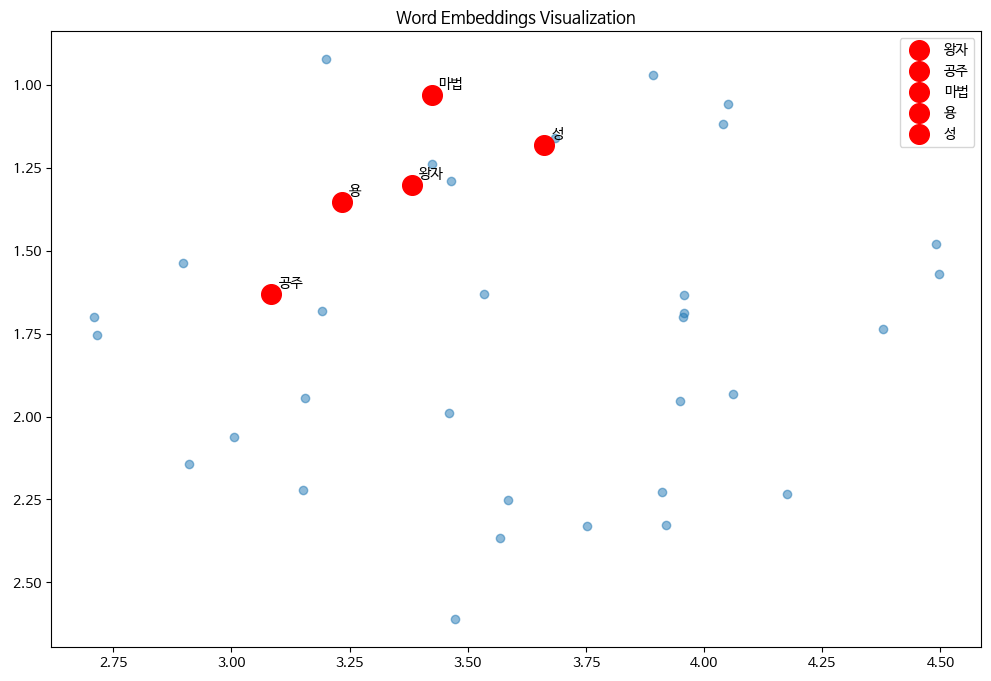

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


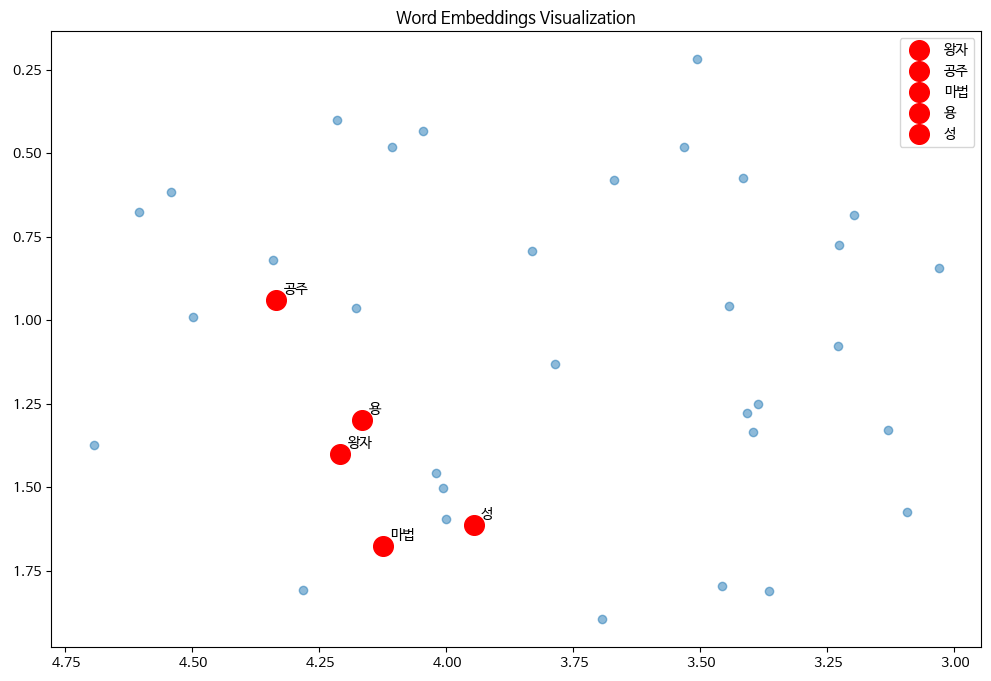

In [17]:
# t-SNE를 사용한 임베딩 시각화
def visualize_embeddings(model, keywords):
    # 모든 단어 벡터 추출
    word_vectors = model.wv.vectors
    words = model.wv.index_to_key

    # t-SNE로 2D 차원 축소
    tsne = TSNE(n_components=2, random_state=42)
    reduced_vectors = tsne.fit_transform(word_vectors)

    # 플롯 생성
    plt.figure(figsize=(12, 8))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.5)

    # 키워드 강조
    for keyword in keywords:
        if keyword in words:
            idx = words.index(keyword)
            plt.scatter(reduced_vectors[idx, 0], reduced_vectors[idx, 1],
                        color='red', s=200, label=keyword)
            plt.annotate(keyword,
                         (reduced_vectors[idx, 0], reduced_vectors[idx, 1]),
                         xytext=(5, 5), textcoords='offset points')

    plt.title('Word Embeddings Visualization')
    plt.legend()
    plt.show()

# CBOW와 Skip-gram 모델 시각화
visualize_embeddings(cbow_model, keywords)
visualize_embeddings(skipgram_model, keywords)

# 🔍 Word2Vec 모델 비교 분석 결과

## 1. 유사도 측면 분석

### 주요 관찰 결과
- **CBOW**와 **Skip-gram** 모델의 유사 단어 결과가 매우 유사함
- 주요 키워드별 상위 유사 단어의 순위와 점수가 거의 일치

## 2. 코퍼스 특징

### 문서 특성
- 📜 짧은 텍스트 (30문장)
- 📖 서사적 맥락
- 🌈 상징적이고 은유적 표현 다수

## 3. 모델 적합성 평가

### CBOW 모델 선호 근거
- ✅ 짧은 문장 구조에 최적화
- 🔗 밀집된 의미 네트워크 구축
- 💨 계산 효율성 우수

### 주요 근거
- 유사 단어 점수 거의 동일
- 계산 시간 및 리소스 효율성
- 소규모 동화 텍스트 특성에 부합

## 4. 한계점 및 개선 방향

### 개선 전략
1. 데이터셋 확장
2. 전처리 고도화
   - 형태소 분석 정교화
   - 불용어 리스트 최적화
   - 중요 키워드 가중치 조정

3. 하이퍼파라미터 튜닝
   - 벡터 차원 조정
   - 윈도우 크기 최적화
   - 학습 반복 횟수 실험

## 5. 결론

### 최종 평가
- 🏆 동화 코퍼스에서 **CBOW 모델** 더 효과적
- 🎯 의미적 연관성 높은 단어 임베딩 성공
- 🚀 지속적인 모델 개선 및 데이터 확장 필요

---

**💡 Insight:** 작은 코퍼스에서의 Word2Vec 모델 성능은 데이터 특성과 전처리에 매우 민감합니다.